


# Assignment : Surprise Housing

## Problem Description

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
    1. Which variables are significant in predicting the price of a house, and
    2. How well those variables describe the price of a house.
Also, determine the optimal value of lambda for ridge and lasso regression.

## Objective

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Importing required Libraries

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
import datetime

#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import datetime
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
from RegscorePy import *
import plotly.graph_objects as go

##### Functions

In [2]:
def create_graph(x_trace,y_trace1,y_trace2,xaxistitle,yaxistitle,trace1_title,trace2_title):
    # Create traces
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x_trace, y=y_trace1,
                        mode='lines+markers',
                        name=trace1_title))
    fig.add_trace(go.Scatter(x=x_trace, y=y_trace2,
                        mode='lines+markers',
                        name=trace2_title))
    fig.update_layout(xaxis_title=xaxistitle,yaxis_title=yaxistitle)
    return fig

### Data Understanding and Cleaning

#### Importing Data

In [3]:
#Reading the pandas dataframe
df = pd.read_csv('data/train.csv')
print(df.shape)

(1460, 81)


There are 1460 records and 81 columns in the data.

In [4]:
#Let's have a quick glance of data
df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
#As the first column id is only used as an identifier, we can drop this.
df.drop('Id', axis = 1, inplace = True)
print(df.shape)

(1460, 80)


In [6]:
#Get statistical measures for the dataframe
df.describe().T

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1980.0    2

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Dealing with Missing Values

In [8]:
#Lets first calculate the proportion of missing values across columns
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing}).sort_values('percent_missing',ascending=False)
#Only display columns having missing values
display(missing_value_df[missing_value_df.percent_missing>0])

column_name  percent_missing
PoolQC              PoolQC        99.520548
MiscFeature    MiscFeature        96.301370
Alley                Alley        93.767123
Fence                Fence        80.753425
FireplaceQu    FireplaceQu        47.260274
LotFrontage    LotFrontage        17.739726
GarageYrBlt    GarageYrBlt         5.547945
GarageCond      GarageCond         5.547945
GarageType      GarageType         5.547945
GarageFinish  GarageFinish         5.547945
GarageQual      GarageQual         5.547945
BsmtExposure  BsmtExposure         2.602740
BsmtFinType2  BsmtFinType2         2.602740
BsmtCond          BsmtCond         2.534247
BsmtQual          BsmtQual         2.534247
BsmtFinType1  BsmtFinType1         2.534247
MasVnrArea      MasVnrArea         0.547945
MasVnrType      MasVnrType         0.547945
Electrical      Electrical         0.068493

In [9]:
#let us remove those variables having more than 80 percent of missing values.
cols_to_remove = list(missing_value_df[missing_value_df.percent_missing>80]['column_name'])
df_dropped = df.drop(cols_to_remove, axis = 1)
print('Shape of the original df:', df.shape)
print('Shape after dropping above mentioned variables:', df_dropped.shape)

Shape of the original df: (1460, 80)
Shape after dropping above mentioned variables: (1460, 76)


#### Filling missing values

There are some columns which are representing the house features such as 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond' etc. These columns also have missing values present across them. As these indicate, some of the features of the house such as garage and basement, my assumption is the missing values might be due to the case that there is no garage or basement present in the house. Thus, using this assumption, we will impute the missing values with the associated No Garage or No Basement class.

In [10]:
for column in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df_dropped[column].fillna('No Garage', inplace=True)

df_dropped['GarageYrBlt'].fillna(0, inplace=True)

for col in ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']:
    df_dropped[col].fillna('No Basement', inplace=True)

Let us again have a look for missing values now.

In [11]:
#Lets first calculate the proportion of missing values across columns
percent_missing = df_dropped.isnull().sum() * 100 / len(df_dropped)
missing_value_df_dropped = pd.DataFrame({'column_name': df_dropped.columns,'percent_missing': percent_missing}).sort_values('percent_missing',ascending=False)
#Only display columns having missing values
display(missing_value_df_dropped[missing_value_df_dropped.percent_missing>0])

column_name  percent_missing
FireplaceQu  FireplaceQu        47.260274
LotFrontage  LotFrontage        17.739726
MasVnrType    MasVnrType         0.547945
MasVnrArea    MasVnrArea         0.547945
Electrical    Electrical         0.068493

Now let us replace the value of the FireplaceQu variable with the appropriate missing value imputation method. As it is a categorical variable, we can replace it with the mode i.e. most frequent value. Let us find out which is the most frequent value for this column.

In [12]:
#Unique values in 'FireplaceQu'
df_dropped['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [13]:
df_dropped['FireplaceQu'].fillna('No Fireplace', inplace=True)

Now the only column left with significant number of missing value records is LotFrontage, let us understand the importance of this variable with respect to the outcome variable and then will take a decisionon either dropping it or imputing the missing values.

In [14]:
fig = px.scatter(x=df_dropped['LotFrontage'], y=df_dropped['SalePrice'])
fig.update_layout(
    title="Relation between LotFrontage and SalePrice",
    xaxis_title="LotFrontage",
    yaxis_title="Sale Price")
fig.show()

There seems to be a positve relation between the SalePrice and LotFrontage. Thus, we will impute the missing values of the column LotFrontage with the mean values.

In [15]:
df_dropped.loc[:,'LotFrontage'] = df_dropped.loc[:, 'LotFrontage'].fillna(df_dropped['LotFrontage'].median())

Let us know look at the missing values distribution.

In [16]:
#Lets first calculate the proportion of missing values across columns
percent_missing = df_dropped.isnull().sum() * 100 / len(df_dropped)
missing_value_df_dropped = pd.DataFrame({'column_name': df_dropped.columns,'percent_missing': percent_missing}).sort_values('percent_missing',ascending=False)
#Only display columns having missing values
display(missing_value_df_dropped[missing_value_df_dropped.percent_missing>0])

column_name  percent_missing
MasVnrType  MasVnrType         0.547945
MasVnrArea  MasVnrArea         0.547945
Electrical  Electrical         0.068493

Let us now remove the rows of missing values in order to get rid of missing values. As the number is small, we can remove them.

In [17]:
df_dropped.dropna(inplace = True)

In [18]:
#Lets first calculate the proportion of missing values across columns
percent_missing = df_dropped.isnull().sum() * 100 / len(df_dropped)
missing_value_df_dropped = pd.DataFrame({'column_name': df_dropped.columns,'percent_missing': percent_missing}).sort_values('percent_missing',ascending=False)
#Only display columns having missing values
display(missing_value_df_dropped[missing_value_df_dropped.percent_missing>0])

Empty DataFrame
Columns: [column_name, percent_missing]
Index: []

Finally there are no missing values in the dataset.

#### Output Variable : SalePrice

In [19]:
#Let's visualize the distribution of sale price
fig = px.histogram(df, x="SalePrice")
fig.show()

 Distribution for the variable SalePrice seems to be normal with some outliers on the right side.

#### Derived Variable

##### Age of House

In [20]:
df_dropped['Current_year'] = datetime.datetime.now().year
df_dropped["Age"] = df_dropped['Current_year'] - df_dropped['YearBuilt']
df_dropped.drop(['Current_year', 'YearBuilt'], axis = 1, inplace = True)

In [21]:
fig = px.scatter(x=df_dropped['Age'], y=df_dropped['SalePrice'])
fig.update_layout(
    title="Relation between Age of House and SalePrice",
    xaxis_title="Age of House",
    yaxis_title="Sale Price")
fig.show()

#### Correlation Plot

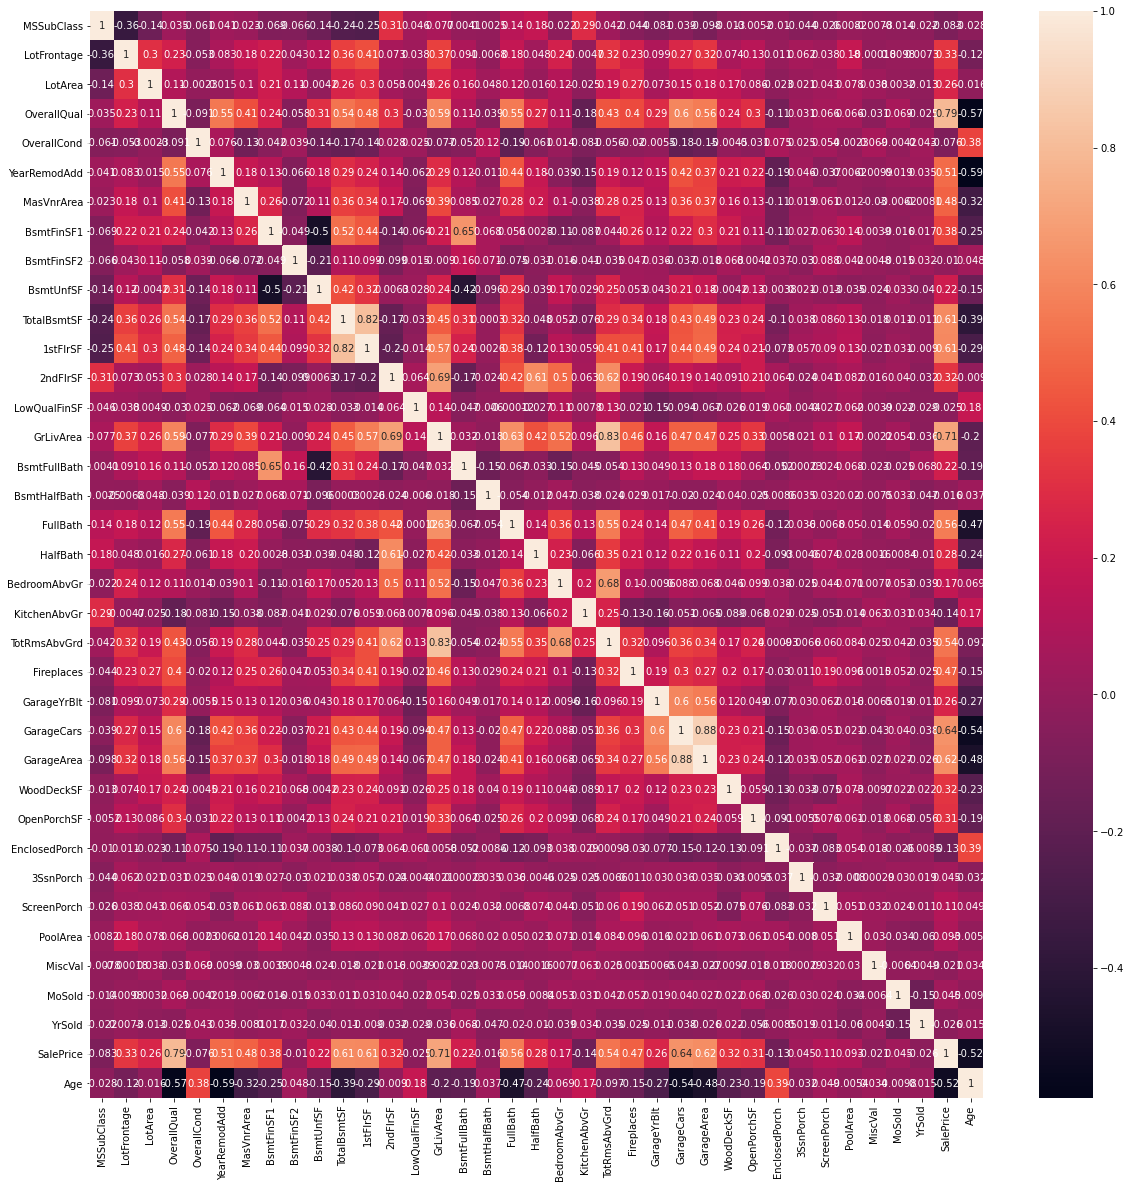

In [22]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_dropped.corr(), annot = True)

Though the correlation plot seems to be condensed as the number of features are more but we can see that there are some variables which are highly correlated with each other. Let's us find out those elements.

In [23]:
#identify highly correlated variables and drop those
corr_matrix = df_dropped.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.80)]
print("Following column are highly correlated variables : ",col_to_drop)
#Dropping these variables
df_dropped.drop(df[col_to_drop], axis=1, inplace = True)
df_dropped.shape

Following column are highly correlated variables :  ['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']


(1451, 73)

#### Create Dummy Variables for categorical variables

Before moving to any model generation process, let us represent the catgerical variables with the help of dummy variables and drop the original variables.

In [24]:
#Identifying numerical and non-numerical columns
NonNumericColumns = []
NumericColumns = []

for col in list(df_dropped):
    if df_dropped[col].dtypes == 'object':
        NonNumericColumns.append(col)  
    else:
        NumericColumns.append(col)
print('Non-Numerical columns: ',NonNumericColumns)

print('Numerical columns: ',NumericColumns)

Non-Numerical columns:  ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical columns:  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Mis

In [25]:
#Generate dummies for categorical variables
df_dummy = pd.get_dummies(df_dropped[NonNumericColumns], drop_first=True)

In [26]:
#Concating the dataframe with dummies
df_concat = pd.concat([df_dropped, df_dummy], axis=1)
df_concat.shape

(1451, 283)

In [27]:
#Let's drop the original columns from where dummies are created
df_final = df_concat.drop(NonNumericColumns, axis = 1)
df_final.shape

(1451, 244)

#### Train Test Split

Let us divide the dataframe into train and test for the model building process.

In [28]:
X = df_final.drop('SalePrice', axis=1)
y = df_final['SalePrice']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print('X train Shape:', X_train.shape)
print('X test Shape:', X_test.shape)
print('y train Shape:', y_train.shape)
print('y test Shape:', y_test.shape)

X train Shape: (1015, 243)
X test Shape: (436, 243)
y train Shape: (1015,)
y test Shape: (436,)


In [30]:
X_train.head(5)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
801           30         40.0     4800            4            7   
569           90         69.0     7032            5            5   
1181         120         64.0     5587            8            5   
808           80         85.0    13400            5            5   
1095          20         78.0     9317            6            5   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  \
801           1990         0.0         197           0        999  ...   
569           1979         0.0         943           0          0  ...   
1181          2008       186.0        1480           0        120  ...   
808           1966      1047.0         516         128        380  ...   
1095          2006         0.0          24           0       1290  ...   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
801                0               0             0             0            1   
569                0               0             0             0            1   
1181               0               0             1             0            0   
808                0               0             0             0            1   
1095               0               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
801                       0                     0                     0   
569                       0                     0                     0   
1181                      0                     0                     0   
808                       0                     0                     0   
1095                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
801                      1                      0  
569                      1                      0  
1181                     0                      1  
808                      1                      0  
1095                     1                      0  

[5 rows x 243 columns]

In [31]:
y_train.head(5)

801     109900
569     135960
1181    392500
808     159950
1095    176432
Name: SalePrice, dtype: int64

#### Scaling the values

In [32]:
scaler = StandardScaler()

In [33]:
#Scaling the numerical variables
NumericColumns1 = NumericColumns.copy()
NumericColumns1.remove('SalePrice')
X_train[NumericColumns1] = scaler.fit_transform(X_train[NumericColumns1])
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
801    -0.650652    -1.298599 -0.513865    -1.552452     1.293141   
569     0.788676    -0.041883 -0.315476    -0.824292    -0.538734   
1181    1.508340    -0.258558 -0.443913     1.360189    -0.538734   
808     0.548788     0.651477  0.250537    -0.824292    -0.538734   
1095   -0.890540     0.348132 -0.112376    -0.096131    -0.538734   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  \
801       0.238209   -0.562965   -0.502945   -0.297804   0.936307  ...   
569      -0.301373   -0.562965    1.097605   -0.297804  -1.320626  ...   
1181      1.121161    0.447197    2.249743   -0.297804  -1.049523  ...   
808      -0.939061    5.123271    0.181472    0.484095  -0.462133  ...   
1095      1.023055   -0.562965   -0.874119   -0.297804   1.593732  ...   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
801                0               0             0             0            1   
569                0               0             0             0            1   
1181               0               0             1             0            0   
808                0               0             0             0            1   
1095               0               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
801                       0                     0                     0   
569                       0                     0                     0   
1181                      0                     0                     0   
808                       0                     0                     0   
1095                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
801                      1                      0  
569                      1                      0  
1181                     0                      1  
808                      1                      0  
1095                     1                      0  

[5 rows x 243 columns]

In [34]:
X_test[NumericColumns1] = scaler.transform(X_test[NumericColumns1])
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
357    1.508340    -1.125258 -0.565062    -0.824292    -0.538734   
824   -0.890540     0.478137  0.056414     1.360189    -0.538734   
369   -0.890540    -0.041883 -0.066779    -0.824292     1.293141   
291    3.187555    -0.648573 -0.435025    -0.824292     0.377204   
134   -0.890540     0.348132 -0.021893    -0.824292     0.377204   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  \
357     -0.448532   -0.562965    0.949564   -0.297804  -0.715162  ...   
824      1.023055   -0.562965   -0.925611   -0.297804   2.043312  ...   
369      1.023055   -0.562965   -0.771134    1.278212   0.335362  ...   
291      0.728738   -0.562965   -0.475054   -0.297804  -0.032886  ...   
134      0.385367   -0.562965    0.297330   -0.297804   0.692315  ...   

     SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
357               0               0             0             0            1   
824               0               0             1             0            0   
369               0               0             0             0            1   
291               0               0             0             0            1   
134               0               0             0             0            1   

     SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
357                      0                     0                     0   
824                      0                     0                     0   
369                      0                     0                     0   
291                      0                     0                     0   
134                      0                     0                     0   

     SaleCondition_Normal  SaleCondition_Partial  
357                     1                      0  
824                     0                      1  
369                     1                      0  
291                     1                      0  
134                     1                      0  

[5 rows x 243 columns]

#### Model Building and Evaluation

Let us start with model building process.

##### Ridge Regression

In [35]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [36]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.009338      0.001401         0.001503        0.000491      0.0001   
1       0.006002      0.003088         0.000736        0.000652       0.001   
2       0.009373      0.007653         0.000000        0.000000        0.01   
3       0.009633      0.008815         0.000480        0.000601        0.05   
4       0.008624      0.004985         0.000443        0.000547         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -24415.859548      -15931.479124      -22068.883611   
1   {'alpha': 0.001}      -24408.933347      -15897.439498      -21994.079154   
2    {'alpha': 0.01}      -24350.604854      -15825.386856      -21422.235154   
3    {'alpha': 0.05}      -24177.321290      -16962.802364      -20268.077001   
4     {'alpha': 0.1}      -24021.131609      -17663.438506      -19837.455310   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -21589.204356  ...    -21020.172649     2787.642292               27   
1      -21500.267599  ...    -20972.710187     2789.108653               26   
2      -20798.892351  ...    -20657.087498     2743.954401               24   
3      -20397.376670  ...    -20532.946601     2290.080532               20   
4      -20452.491290  ...    -20608.847402     2056.745677               22   

   split0_train_score  split1_train_score  split2_train_score  \
0       -11375.193348       -12723.496575       -12172.502944   
1       -11375.316327       -12718.075282       -12165.229425   
2       -11377.841931       -12760.465559       -12171.045450   
3       -11410.130164       -13502.309039       -12729.902238   
4       -11443.565034       -14114.644121       -13313.418123   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -12370.827997       -11296.955743     -11987.795321       561.182283  
1       -12373.266692       -11295.083940     -11985.394333       560.059035  
2       -12475.728588       -11370.031030     -12031.022511       567.980931  
3       -13184.004165       -12144.862235     -12594.241568       747.645888  
4       -13750.445949       -12820.369325     -13088.488510       929.455481  

[5 rows x 21 columns]

In [37]:
create_graph(cv_results['param_alpha'],cv_results['mean_train_score'],cv_results['mean_test_score'],"alpha","Negative Mean Absolute Error","train","test")

Here, we can see that optimal value of alpha is 10 for ridge regression.

In [38]:
alpha = 10
ridge_v1 = Ridge(alpha=alpha)

ridge_v1.fit(X_train, y_train)
ridge_v1.coef_

array([ -5825.86465068,  -2993.36303312,   4789.95146384,  16290.25049071,
         5324.8987343 ,   1506.15106639,   3686.80299338,   -805.96426504,
          -78.29738635,    206.43454993,   -667.07923541,   6312.44199653,
         -467.98502236,  23679.71531065,   5075.22005077,   -614.88673492,
         3381.37789073,   2413.36563711,    749.70696003,  -2849.03658377,
         4018.62463025,  -1822.21262937,  10980.98332662,   2427.09705592,
         -962.1370577 ,    768.15291009,   1738.04598292,   1749.17184864,
         1103.27394299,   -883.26922634,    269.85906762,   -457.94160191,
        -2440.61357329,   6505.55644071,   4169.9839816 ,   5936.03797113,
        -1294.40459262,   9427.00466407,   6602.52020807, -12113.52992543,
        -1637.82651326,  14095.07252965,   5918.14017182,  14065.45410023,
        -2654.50481084,   6375.34182078,  -7282.68925116,  -4119.34871675,
        -1598.35659019,   5499.78313863,  -4233.84697546,  -2469.48403935,
         1048.2479453 ,  

##### Lasso Regression

In [39]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# for cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   13.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [40]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.106479      0.012562         0.006675        0.007315      0.0001   
1       0.113237      0.020020         0.003124        0.006248       0.001   
2       0.116110      0.017503         0.000330        0.000661        0.01   
3       0.109329      0.013204         0.000000        0.000000        0.05   
4       0.109153      0.013739         0.000000        0.000000         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -24328.619254      -13583.559191      -22163.454972   
1   {'alpha': 0.001}      -24328.090251      -13583.511252      -22161.510988   
2    {'alpha': 0.01}      -24324.504774      -13583.029666      -22142.074816   
3    {'alpha': 0.05}      -24319.271513      -13580.990603      -22055.813172   
4     {'alpha': 0.1}      -24313.149292      -13578.950454      -21948.046123   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -21619.750847  ...    -20552.004846     3655.726987               27   
1      -21619.895406  ...    -20551.391344     3655.453706               26   
2      -21621.397040  ...    -20545.611151     3653.085233               25   
3      -21616.120916  ...    -20523.453595     3644.726583               24   
4      -21600.490308  ...    -20495.487781     3634.198844               23   

   split0_train_score  split1_train_score  split2_train_score  \
0       -11393.949322       -12788.040167       -12191.575916   
1       -11393.932536       -12788.020968       -12191.567596   
2       -11393.893668       -12787.905438       -12191.560463   
3       -11394.307054       -12787.782319       -12191.809158   
4       -11394.959174       -12788.041141       -12192.484659   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -12400.479273       -11296.577595     -12014.124455       579.516227  
1       -12400.456699       -11296.582416     -12014.112043       579.509979  
2       -12400.322771       -11296.744018     -12014.085272       579.429133  
3       -12399.981355       -11297.593102     -12014.294598       579.067274  
4       -12399.817828       -11298.822354     -12014.825031       578.712202  

[5 rows x 21 columns]

In [41]:
create_graph(cv_results['param_alpha'],cv_results['mean_train_score'],cv_results['mean_test_score'],"alpha","Negative Mean Absolute Error","train","test")

We can clearly see that here the optimal value of alpha lies somewhere at 100 for lasso regression.

In [42]:
alpha_v1 =100

lasso_v1 = Lasso(alpha=alpha_v1)
        
lasso_v1.fit(X_train, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [43]:
lasso_v1.coef_

array([-6.43221160e+03, -2.54721084e+03,  5.10551248e+03,  1.56712823e+04,
        5.83805401e+03,  1.44683306e+03,  3.25129763e+03, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -2.91958051e+02,  3.74120159e+03,
       -8.33854992e+02,  2.72692749e+04,  4.81059499e+03, -2.94678670e+02,
        2.97959612e+03,  1.75466835e+03, -0.00000000e+00, -2.74923129e+03,
        1.63023179e+03, -2.32129163e+03,  1.00719312e+04,  2.08983154e+03,
       -1.46562452e+02,  3.47328421e+02,  1.31364416e+03,  1.67555385e+03,
        5.43844847e+02, -6.81936606e+02,  2.03370738e+02, -3.29332229e+02,
       -4.65408286e+03,  1.21739535e+03,  0.00000000e+00,  2.58432521e+03,
       -3.85793168e+03,  9.94389748e+03,  2.83680588e+03, -2.24798371e+04,
       -1.35082463e+03,  1.20195100e+04,  1.63119931e+03,  1.02723586e+04,
       -0.00000000e+00,  7.92151364e+03, -4.29813916e+03, -0.00000000e+00,
       -0.00000000e+00,  1.66601740e+03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

Let us now find the error distribution for both of these models with the selected alpha.

Error distribution : Training dataset


Text(0.5, 1.0, 'Error disribution : Lasso regression')

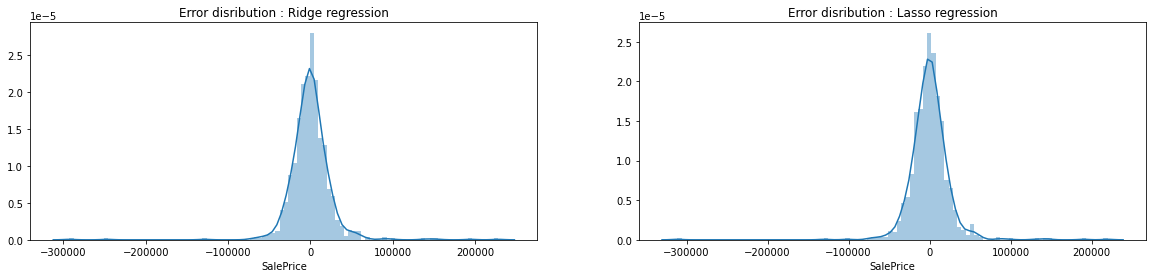

In [44]:
y_pred_ridge_train = ridge_v1.predict(X_train)
y_pred_lasso_train = lasso_v1.predict(X_train)
print('Error distribution : Training dataset')
plt.figure(figsize=(20,4))
plt.subplot(1, 2, 1)
sns.distplot((y_train - y_pred_ridge_train), bins = 100)
plt.title('Error disribution : Ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_train - y_pred_lasso_train), bins = 100)
plt.title('Error disribution : Lasso regression')
# plt.subplots_adjust(wspace = .5)

In [45]:
print('R-Squared in train dataset')
print('R-Squared for ridge:', r2_score(y_train, y_pred_ridge_train))
print('R-Squared for lasso:', r2_score(y_train, y_pred_lasso_train))

R-Squared in train dataset
R-Squared for ridge: 0.8899108371395765
R-Squared for lasso: 0.8977171424533265


Error distribution : Test dataset


Text(0.5, 1.0, 'Error disribution : Lasso regression')

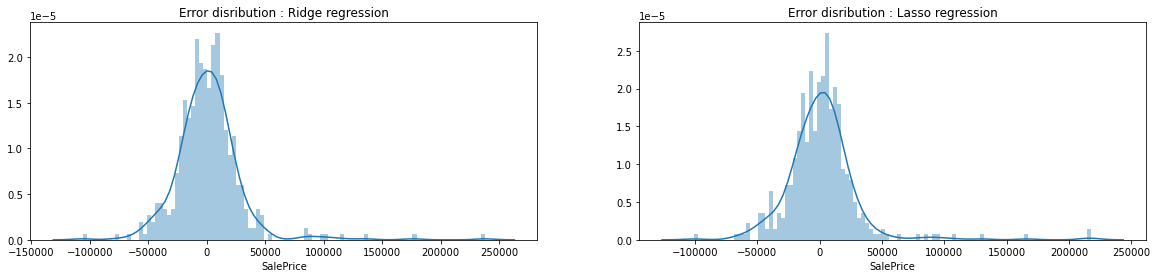

In [46]:
y_pred_ridge_test = ridge_v1.predict(X_test)
y_pred_lasso_test = lasso_v1.predict(X_test)
print('Error distribution : Test dataset')
plt.figure(figsize=(20,4))
plt.subplot(1, 2, 1)
sns.distplot((y_test - y_pred_ridge_test), bins = 100)
plt.title('Error disribution : Ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_pred_lasso_test), bins = 100)
plt.title('Error disribution : Lasso regression')

In [47]:
print('R-Squared : Training dataset')
print('R-Squared for ridge:', round(r2_score(y_train, y_pred_ridge_train), 2))
print('R-Squared for lasso:', round(r2_score(y_train, y_pred_lasso_train), 2))

print('R-Squared : Test dataset')
print('R-Squared for ridge:', round(r2_score(y_test, y_pred_ridge_test), 2))
print('R-Squared for lasso:', round(r2_score(y_test, y_pred_lasso_test), 2))

R-Squared : Training dataset
R-Squared for ridge: 0.89
R-Squared for lasso: 0.9
R-Squared : Test dataset
R-Squared for ridge: 0.87
R-Squared for lasso: 0.87


Let us also calculate the AIC and BIC score for these model in order to validate our results.

##### AIC

In [48]:
print('AIC : Training dataset')
print('AIC for ridge:', round(aic.aic(y_train, y_pred_ridge_train,len(X_train)), 2))
print('AIC for lasso:', round(aic.aic(y_train, y_pred_lasso_train,len(X_train)), 2))

print('AIC : Test dataset')
print('AIC for ridge:', round(aic.aic(y_test, y_pred_ridge_test,len(X_train)), 2))
print('AIC for lasso:', round(aic.aic(y_test, y_pred_lasso_test,len(X_train)), 2))

AIC : Training dataset
AIC for ridge: 22686.9
AIC for lasso: 22612.25
AIC : Test dataset
AIC for ridge: 10972.46
AIC for lasso: 10986.8


##### BIC

In [49]:
print('BIC : Training dataset')
print('BIC for ridge:', round(bic.bic(y_train, y_pred_ridge_train,len(X_train)), 2))
print('BIC for lasso:', round(bic.bic(y_train, y_pred_lasso_train,len(X_train)), 2))

print('BIC : Test dataset')
print('BIC for ridge:', round(bic.bic(y_test, y_pred_ridge_test,len(X_train)), 2))
print('BIC for lasso:', round(bic.bic(y_test, y_pred_lasso_test,len(X_train)), 2))

BIC : Training dataset
BIC for ridge: 27683.39
BIC for lasso: 27608.73
BIC : Test dataset
BIC for ridge: 15111.27
BIC for lasso: 15125.6


###  Optimal value of lambda for ridge and lasso regression

Till now, we have found that the optimal value for alpha in case of ridge and lasso regression is 10 and 100 respectively.

### Model Selection

We will suggest using Lasso model with lambda as 100 for predicting the House price in the surprise housing problem. <br>
Also, there is one more benefit of using this model as it makes most of the coefficients which helps in identifying the most important variables.

### Significant Features

In [50]:
model_parameters = list(lasso_v1.coef_)
model_parameters.insert(0, lasso_v1.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
pd.DataFrame(var_coeff,columns=['Variable','Score']).head(5)

Variable       Score
0     constant  152098.040
1   MSSubClass   -6432.212
2  LotFrontage   -2547.211
3      LotArea    5105.512
4  OverallQual   15671.282

In [51]:
#Features (including dummies) along with their coefficients
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
var_details = pd.DataFrame(var_coeff,columns=['Variable','Score']).sort_values(by="Score",ascending=False)
display(var_details)

Variable       Score
0                constant  152098.040
66       RoofMatl_WdShngl   35649.179
50   Neighborhood_NoRidge   35012.592
51   Neighborhood_NridgHt   31231.407
11              GrLivArea   27269.275
..                    ...         ...
103        KitchenQual_TA  -18890.877
102        KitchenQual_Gd  -19266.828
83            BsmtQual_Gd  -19712.370
35           LotShape_IR3  -22479.837
58        Condition2_PosN -221831.578

[117 rows x 2 columns]

In [52]:
#length of the var_coeff
len(var_details)

117

##### Variables with positive effect on Sale Price

In [53]:
var_pos = var_details[var_details['Score']>0].sort_values(by='Score',ascending=False).reset_index(drop=True)
var_pos.to_excel("lasso_positive_alpha100.xlsx")
var_pos.head(10)


Variable       Score
0              constant  152098.040
1      RoofMatl_WdShngl   35649.179
2  Neighborhood_NoRidge   35012.592
3  Neighborhood_NridgHt   31231.407
4             GrLivArea   27269.275
5  Neighborhood_StoneBr   26290.301
6  Neighborhood_Crawfor   19453.278
7   Exterior2nd_ImStucc   18704.097
8      RoofMatl_CompShg   18130.234
9       BsmtExposure_Gd   17192.243

In [54]:
print(list(var_pos['Variable']))

['constant', 'RoofMatl_WdShngl', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'GrLivArea', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Exterior2nd_ImStucc', 'RoofMatl_CompShg', 'BsmtExposure_Gd', 'OverallQual', 'Exterior1st_BrkFace', 'SaleType_New', 'LandContour_HLS', 'Neighborhood_Somerst', 'LandContour_Lvl', 'GarageCars', 'Functional_Typ', 'Street_Pave', 'LotConfig_CulDSac', 'Condition1_Norm', 'Neighborhood_BrkSide', 'HouseStyle_1Story', 'BsmtFinType1_GLQ', 'Exterior2nd_CmentBd', 'MasVnrType_None', 'BsmtCond_TA', 'OverallCond', 'LotArea', 'BsmtFullBath', 'GarageType_BuiltIn', 'MasVnrType_Stone', 'BsmtFinType1_BLQ', '2ndFlrSF', 'SaleCondition_Normal', 'MasVnrArea', 'Exterior2nd_VinylSd', 'FullBath', 'LotShape_IR2', 'MSZoning_RL', 'FireplaceQu_TA', 'WoodDeckSF', 'HalfBath', 'BsmtFinType2_Unf', 'ScreenPorch', 'LandSlope_Mod', 'LandContour_Low', 'Fireplaces', 'Neighborhood_Veenker', 'YearRemodAdd', 'GarageQual_Gd', 'Foundation_PConc', '3SsnPorch', 'PavedDrive_Y', 'HouseStyle_1.5U

> The above variables are having a positive effect on the sale price.

##### Variables with negative effect on Sale Price

In [55]:
var_neg = var_details[var_details['Score']<0].sort_values(by='Score',ascending=True).reset_index(drop=True)
var_neg.to_excel("lasso_negative_alpha100.xlsx")
var_neg.head(10)

Variable       Score
0           Condition2_PosN -221831.578
1              LotShape_IR3  -22479.837
2               BsmtQual_Gd  -19712.370
3            KitchenQual_Gd  -19266.828
4            KitchenQual_TA  -18890.877
5               BsmtQual_TA  -16078.458
6  BsmtExposure_No Basement  -13261.324
7        Exterior2nd_Stucco  -11067.397
8      Neighborhood_Edwards   -9001.847
9               BsmtQual_Fa   -7616.000

In [56]:
print(list(var_neg['Variable']))

['Condition2_PosN', 'LotShape_IR3', 'BsmtQual_Gd', 'KitchenQual_Gd', 'KitchenQual_TA', 'BsmtQual_TA', 'BsmtExposure_No Basement', 'Exterior2nd_Stucco', 'Neighborhood_Edwards', 'BsmtQual_Fa', 'BsmtExposure_No', 'MSSubClass', 'Exterior2nd_Wd Shng', 'KitchenQual_Fa', 'RoofStyle_Gable', 'GarageQual_Fa', 'ExterQual_TA', 'HouseStyle_2Story', 'Neighborhood_Mitchel', 'BsmtFinType1_Unf', 'Condition1_Feedr', 'Age', 'Exterior1st_Stucco', 'LotConfig_FR2', 'BldgType_Twnhs', 'MSZoning_RM', 'BsmtExposure_Mn', 'GarageFinish_RFn', 'Neighborhood_NWAmes', 'BsmtCond_No Basement', 'KitchenAbvGr', 'LotFrontage', 'HeatingQC_Gd', 'Neighborhood_Gilbert', 'GarageYrBlt', 'GarageFinish_Unf', 'HeatingQC_Fa', 'BsmtQual_No Basement', 'Neighborhood_NAmes', 'Exterior1st_HdBoard', 'GarageQual_TA', 'LotShape_Reg', 'ExterQual_Gd', 'LowQualFinSF', 'MiscVal', 'HeatingQC_TA', 'Neighborhood_OldTown', 'YrSold', 'BsmtHalfBath', 'TotalBsmtSF', 'BsmtFinType2_Rec', 'BldgType_TwnhsE', 'ExterCond_TA', 'GarageType_Detchd', 'OpenPorc

> Above variables are having a negative effect on the Sale Price.

## Summary of Results

1. Optimum value for lambda in ridge regression is 10.
2. Optimum value for lambda in lasso regression is 100.
3. By using the knowledge of variables having negative impact on Sale price, company may highlight these features and buy house at low cost.
4. Same Knowledge can then be used in order to improve the house where they lag and sell them by highlighting the positive features of the house.
5. R-Squared in train dataset: R-Squared for ridge: 0.89, R-Squared for lasso: 0.9
6. R-Squared in test dataset: R-Squared for ridge: 0.87, R-Squared for lasso: 0.87

##### Subjective Questions

##### Double the Alpha

###### Ridge Regression

In [57]:
alpha_v2 = 10
ridge_v2 = Ridge(alpha=alpha)

ridge_v2.fit(X_train, y_train)

model_parameters = list(ridge_v2.coef_)
model_parameters.insert(0, ridge_v2.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
pd.DataFrame(var_coeff,columns=['Variable','Score']).sort_values(by=['Score']).head(5)

Variable      Score
87   Condition2_PosN -24685.566
159      BsmtQual_Gd -19787.910
197   KitchenQual_Gd -17174.425
198   KitchenQual_TA -16337.688
161      BsmtQual_TA -15973.921

In [58]:
#Features (including dummies) along with their coefficients
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
var_details = pd.DataFrame(var_coeff,columns=['Variable','Score']).sort_values(by="Score",ascending=False)
display(var_details)

Variable       Score
0                constant  146216.389
66   Neighborhood_NoRidge   25209.131
67   Neighborhood_NridgHt   24550.888
14              GrLivArea   23679.715
73   Neighborhood_StoneBr   18706.495
..                    ...         ...
156           BsmtQual_TA  -15973.921
193        KitchenQual_TA  -16337.688
192        KitchenQual_Gd  -17174.425
154           BsmtQual_Gd  -19787.910
87        Condition2_PosN  -24685.566

[239 rows x 2 columns]

##### Variables with positive effect

In [59]:
var_pos = var_details[var_details['Score']>0].sort_values(by='Score',ascending=False).reset_index(drop=True)
var_pos.to_excel("ridge_positive_alpha10.xlsx")
var_pos.head(10)

Variable       Score
0              constant  146216.389
1  Neighborhood_NoRidge   25209.131
2  Neighborhood_NridgHt   24550.888
3             GrLivArea   23679.715
4  Neighborhood_StoneBr   18706.495
5           OverallQual   16290.250
6      RoofMatl_WdShngl   15237.162
7       Condition2_Norm   14323.009
8       LandContour_HLS   14095.073
9       LandContour_Lvl   14065.454

In [60]:
print(list(var_pos['Variable']))

['constant', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'GrLivArea', 'Neighborhood_StoneBr', 'OverallQual', 'RoofMatl_WdShngl', 'Condition2_Norm', 'LandContour_HLS', 'LandContour_Lvl', 'Exterior2nd_ImStucc', 'Neighborhood_Crawfor', 'BsmtExposure_Gd', 'Exterior1st_BrkFace', 'GarageCars', 'HouseStyle_1Story', 'RoofMatl_CompShg', 'Functional_Typ', 'Street_Pave', 'Condition1_Norm', 'SaleType_New', 'BsmtFinType1_GLQ', 'SaleType_ConLI', 'LotShape_IR2', 'MSZoning_FV', 'LotConfig_CulDSac', '2ndFlrSF', 'HouseStyle_1.5Unf', 'MSZoning_RL', 'BsmtCond_TA', 'LandContour_Low', 'SaleCondition_Normal', 'MasVnrType_None', 'Neighborhood_Somerst', 'LandSlope_Mod', 'Neighborhood_Veenker', 'OverallCond', 'Exterior2nd_CmentBd', 'BsmtFullBath', 'Exterior2nd_BrkFace', 'MasVnrType_Stone', 'Neighborhood_BrkSide', 'Condition2_PosA', 'LotArea', 'SaleType_CWD', 'GarageQual_Gd', 'SaleCondition_Partial', 'MSZoning_RH', 'Functional_Min2', 'SaleCondition_Family', 'Fireplaces', 'SaleType_Oth', 'MasVnrArea', 'Firepl

> The above variables are having a positive effect on the sale price after changing the alpha as 20.

##### Variables with negative effect on Sale Price

In [61]:
var_neg = var_details[var_details['Score']<0].sort_values(by='Score',ascending=True).reset_index(drop=True)
var_neg.to_excel("ridge_negative_alpha10.xlsx")
var_neg.head(10)

Variable      Score
0       Condition2_PosN -24685.566
1           BsmtQual_Gd -19787.910
2        KitchenQual_Gd -17174.425
3        KitchenQual_TA -16337.688
4           BsmtQual_TA -15973.921
5  Neighborhood_Edwards -15712.685
6          LotShape_IR3 -12113.530
7  Neighborhood_Mitchel -10582.389
8    Exterior2nd_Stucco -10094.131
9  Neighborhood_Gilbert  -9315.152

In [62]:
print(list(var_neg['Variable']))

['Condition2_PosN', 'BsmtQual_Gd', 'KitchenQual_Gd', 'KitchenQual_TA', 'BsmtQual_TA', 'Neighborhood_Edwards', 'LotShape_IR3', 'Neighborhood_Mitchel', 'Exterior2nd_Stucco', 'Neighborhood_Gilbert', 'BsmtExposure_No', 'BsmtQual_Fa', 'ExterQual_TA', 'Exterior2nd_Wd Shng', 'BldgType_Twnhs', 'GarageQual_Fa', 'Neighborhood_NWAmes', 'Neighborhood_NAmes', 'LotConfig_FR2', 'HouseStyle_2Story', 'Exterior1st_Stucco', 'Heating_OthW', 'BsmtFinType1_Unf', 'Condition1_PosN', 'KitchenQual_Fa', 'MSSubClass', 'Neighborhood_OldTown', 'Condition1_Feedr', 'GarageQual_TA', 'Functional_Maj2', 'Neighborhood_IDOTRR', 'BsmtExposure_No Basement', 'RoofStyle_Gable', 'Condition1_RRAe', 'Neighborhood_Timber', 'BsmtExposure_Mn', 'Neighborhood_CollgCr', 'BsmtFinType1_No Basement', 'BsmtCond_No Basement', 'BsmtQual_No Basement', 'GarageFinish_RFn', 'Neighborhood_Sawyer', 'BldgType_TwnhsE', 'BsmtFinType2_BLQ', 'LandSlope_Sev', 'Foundation_Wood', 'LotConfig_FR3', 'Neighborhood_ClearCr', 'ExterQual_Gd', 'HeatingQC_Gd', 'B

> The above variables are having a negative effect on the sale price after changing the alpha as 20.

###### Lasso Regression

In [63]:
alpha_v2 =200

lasso_v2 = Lasso(alpha=alpha_v2)
        
lasso_v2.fit(X_train, y_train) 

model_parameters = list(lasso_v2.coef_)
model_parameters.insert(0, lasso_v2.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
pd.DataFrame(var_coeff,columns=['Variable','Score']).sort_values(by=['Score']).head(5)

Variable      Score
87        Condition2_PosN -98768.150
197        KitchenQual_Gd -15633.770
159           BsmtQual_Gd -15531.929
198        KitchenQual_TA -15153.421
58   Neighborhood_Edwards -10108.672

In [64]:
#Features (including dummies) along with their coefficients
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
var_details = pd.DataFrame(var_coeff,columns=['Variable','Score']).sort_values(by="Score",ascending=False)
display(var_details)

Variable       Score
0               constant  171784.513
44  Neighborhood_NoRidge   33655.297
45  Neighborhood_NridgHt   31014.114
12             GrLivArea   26312.022
47  Neighborhood_StoneBr   23645.026
..                   ...         ...
40  Neighborhood_Edwards  -10108.672
82        KitchenQual_TA  -15153.421
69           BsmtQual_Gd  -15531.929
81        KitchenQual_Gd  -15633.770
50       Condition2_PosN  -98768.150

[91 rows x 2 columns]

##### Variables with positive effect

In [65]:
var_pos = var_details[var_details['Score']>0].sort_values(by='Score',ascending=False).reset_index(drop=True)
var_pos.to_excel("lasso_positive_alpha200.xlsx")
var_pos.head(10)

Variable       Score
0              constant  171784.513
1  Neighborhood_NoRidge   33655.297
2  Neighborhood_NridgHt   31014.114
3             GrLivArea   26312.022
4  Neighborhood_StoneBr   23645.026
5           OverallQual   17825.014
6       BsmtExposure_Gd   16510.467
7  Neighborhood_Crawfor   15809.670
8   Exterior1st_BrkFace   12049.687
9          SaleType_New   11907.742

In [66]:
print(list(var_pos['Variable']))

['constant', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'GrLivArea', 'Neighborhood_StoneBr', 'OverallQual', 'BsmtExposure_Gd', 'Neighborhood_Crawfor', 'Exterior1st_BrkFace', 'SaleType_New', 'GarageCars', 'Condition1_Norm', 'LandContour_HLS', 'Functional_Typ', 'LandContour_Lvl', 'BsmtFinType1_GLQ', 'Neighborhood_Somerst', 'BsmtCond_TA', 'LotConfig_CulDSac', 'OverallCond', 'BsmtFullBath', 'HouseStyle_1Story', 'LotArea', 'RoofStyle_Hip', 'BsmtFinType1_BLQ', 'Exterior2nd_ImStucc', 'Neighborhood_BrkSide', 'MasVnrArea', 'RoofMatl_CompShg', 'FullBath', 'WoodDeckSF', '2ndFlrSF', 'Exterior2nd_CmentBd', 'Fireplaces', 'MasVnrType_None', 'Exterior2nd_VinylSd', 'ScreenPorch', 'YearRemodAdd', 'HalfBath', 'BsmtFinType2_Unf', 'SaleCondition_Normal', '3SsnPorch', 'GarageType_BuiltIn', 'LotShape_IR2', 'Foundation_PConc', 'PavedDrive_Y', 'PoolArea', 'EnclosedPorch', 'BsmtUnfSF', 'MoSold']


> The above variables are having a positive effect on the sale price after changing the alpha as 20.

##### Variables with negative effect on Sale Price

In [67]:
var_neg = var_details[var_details['Score']<0].sort_values(by='Score',ascending=True).reset_index(drop=True)
var_neg.to_excel("lasso_negative_alpha200.xlsx")
var_neg.head(10)

Variable      Score
0       Condition2_PosN -98768.150
1        KitchenQual_Gd -15633.770
2           BsmtQual_Gd -15531.929
3        KitchenQual_TA -15153.421
4  Neighborhood_Edwards -10108.672
5           BsmtQual_TA  -9779.686
6          LotShape_IR3  -7155.039
7    Exterior2nd_Stucco  -6889.592
8            MSSubClass  -6761.257
9                   Age  -5832.845

In [68]:
print(list(var_neg['Variable']))

['Condition2_PosN', 'KitchenQual_Gd', 'BsmtQual_Gd', 'KitchenQual_TA', 'Neighborhood_Edwards', 'BsmtQual_TA', 'LotShape_IR3', 'Exterior2nd_Stucco', 'MSSubClass', 'Age', 'MSZoning_RM', 'BsmtExposure_No', 'ExterQual_TA', 'HouseStyle_2Story', 'BsmtFinType1_Unf', 'GarageFinish_RFn', 'KitchenAbvGr', 'GarageFinish_Unf', 'GarageYrBlt', 'LotFrontage', 'BsmtExposure_No Basement', 'MasVnrType_BrkFace', 'Exterior1st_Stucco', 'Exterior2nd_Wd Shng', 'Exterior1st_HdBoard', 'HeatingQC_Gd', 'Neighborhood_NAmes', 'GarageQual_Fa', 'Condition1_Feedr', 'LotShape_Reg', 'RoofStyle_Gable', 'MiscVal', 'YrSold', 'LowQualFinSF', 'BldgType_Twnhs', 'OpenPorchSF', 'Neighborhood_NWAmes', 'BsmtExposure_Mn', 'BsmtHalfBath', 'BsmtFinSF2', 'Neighborhood_Mitchel']


> The above variables are having a negative effect on the sale price after changing the alpha as 200.

##### Dropping the five important variable 

In [71]:
X_train_v1 = X_train
X_train_v1 = X_train_v1.drop(["RoofMatl_WdShngl", "Neighborhood_NoRidge", "Neighborhood_NridgHt", "GrLivArea"
, "Neighborhood_StoneBr"],axis=1)

In [75]:
alpha_v1 =100

lasso_v3 = Lasso(alpha=alpha_v1)
        
lasso_v3.fit(X_train_v1, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [81]:
model_parameters = list(lasso_v3.coef_)
model_parameters.insert(0, lasso_v3.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
list(pd.DataFrame(var_coeff,columns=['Variable','Score']).sort_values(by=['Score'],ascending=False).head(6)['Variable'])

['constant',
 'Exterior2nd_Brk Cmn',
 '2ndFlrSF',
 'OverallQual',
 'RoofMatl_Tar&Grv',
 'Neighborhood_CollgCr']

##### Calculate R-Squared After Doubling Alpha for both

In [82]:
alpha_v41 = 20
ridge_v4 = Ridge(alpha=alpha_v41)
ridge_v4.fit(X_train, y_train)

alpha_v42 =200
lasso_v4 = Lasso(alpha=alpha_v42)
lasso_v4.fit(X_train, y_train) 

y_pred_ridge_train_v4 = ridge_v4.predict(X_train)
y_pred_lasso_train_v4 = lasso_v4.predict(X_train)
y_pred_ridge_test_v4 = ridge_v4.predict(X_test)
y_pred_lasso_test_v4 = lasso_v4.predict(X_test)
print('R-Squared : Training dataset')
print('R-Squared for ridge:', round(r2_score(y_train, y_pred_ridge_train_v4), 2))
print('R-Squared for lasso:', round(r2_score(y_train, y_pred_lasso_train_v4), 2))

print('R-Squared : Test dataset')
print('R-Squared for ridge:', round(r2_score(y_test, y_pred_ridge_test_v4), 2))
print('R-Squared for lasso:', round(r2_score(y_test, y_pred_lasso_test_v4), 2))

R-Squared : Training dataset
R-Squared for ridge: 0.88
R-Squared for lasso: 0.88
R-Squared : Test dataset
R-Squared for ridge: 0.87
R-Squared for lasso: 0.87
